# CEE 690-06 - Test

In this assignment we will subset the NED virtual raster database and analyze the resulting data. 

* The virtual raster file can be accessed here:
    * /shared_space/data/NED/NED.vrt
* The bounding box for the region from which we will extract data from is:
    * minlat = 42.342 $^o$ N 
    * minlon = 113.423 $^o$ W
    * maxlat = 42.534 $^o$ N
    * maxlon = 113.143 $^o$ W

### 1.1 Import rasterio

In [73]:
import rasterio

### 1.2 Define the virtual raster file

In [74]:
vrtfile = '/shared_space/data/NED/NED.vrt'
#vrtfile = '/shared_space/data/NED/dem_lat3435_lon-90-89.tif'
#vrtfile = '/shared_space/data/NED30/NED.vrt'

### 1.3 Define the file to which to write the extracted elevation data

In [75]:
ofile = 'output.tif'

### 1.4 Define the parameters for warping the image in bash

In [76]:
minlat = 34.4
maxlat = 34.8
minlon = -89.6
maxlon = -89.2

### 1.5 Warp the virtual raster to extract the data using gdalwarp in bash

In [77]:
import os
!gdalwarp -overwrite -te $minlon $minlat $maxlon $maxlat $vrtfile $ofile

Creating output file that is 1440P x 1440L.
Processing /shared_space/data/NED/NED.vrt [1/1] : 0Using internal nodata values (e.g. -99999) for image /shared_space/data/NED/NED.vrt.
Copying nodata values from source /shared_space/data/NED/NED.vrt to destination output.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


### 1.6 Read in the warped data

In [78]:
import numpy as np
ofile = 'output.tif'
ds = rasterio.open(ofile)
data = ds.read(1)
ds.close()
print(np.unique(data))

[ 77.659645  77.67765   77.680565 ... 208.89914  209.81126  210.90773 ]


### 1.7 Create 1d arrays of lats and lons

In [79]:
minlon = ds.bounds.left
maxlon = ds.bounds.right
minlat = ds.bounds.bottom
maxlat = ds.bounds.top
xres = ds.res[0]
yres = ds.res[1]
nx = ds.width
ny = ds.height
lats = np.linspace(minlat+yres/2,maxlat-yres/2,ny)
lons = np.linspace(minlon+xres/2,maxlon-xres/2,nx)

### 1.8 Plot the map using cartopy

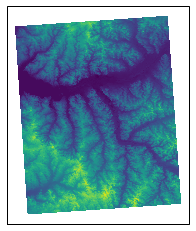

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.epsg(5070))
plt.pcolormesh(lons, lats, data,
             transform=ccrs.PlateCarree())

ax.coastlines()
plt.show()

### 1.9 Plot the histogram of the data

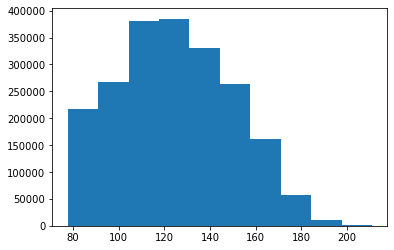

In [81]:
plt.hist(np.reshape(data,data.size))
plt.show()

### 2.0 Compute and report the mean, standard deviation, and median of the data

In [82]:
print('mean:',np.mean(data))
print('std:',np.std(data))
print('median:',np.median(data))

mean: 124.72911
std: 25.001465
median: 123.42428
